## Pandemic Model in Julia using GillesPy2lia

In [1]:
using GillesPy2

In [2]:
m = GillesPy2.model()

param_vals = Dict(
            "exposure"=> 2.6725769102923615e-07, 
            "infect"=> 0.2862670529638084, 
            "progress"=> 0.350641470244625, 
            "recovery"=> 1.650750787134925, 
            "silent_recovery"=> 1.313225037020145, 
            "death"=> 0.03605770636882821,
            "q_trigger" => 20,
            "p1_trigger" => 70,
            "q_rate"=> 0.5499237128381103, 
            "p_rate"=> 0.5810587750454265, 
            "initial_exposed" => 0,
            "initial_cleared" => 0,
            "initial_infected" => 2,
            "initial_symptomatic"=> 22, 
            "initial_dead"=> 0, 
            "initial_recovered"=> 0, 
            "initial_healthy"=> 9999978.0
        )
S = GillesPy2.species("Susceptible", param_vals["initial_healthy"], mode="continuous")
E = GillesPy2.species("Exposed", param_vals["initial_exposed"], mode="continuous")
I = GillesPy2.species("Infected", param_vals["initial_infected"], mode="continuous")
Y = GillesPy2.species("Symptomatic", param_vals["initial_symptomatic"], mode="continuous")
C = GillesPy2.species("Cleared", param_vals["initial_cleared"], mode="continuous")
R = GillesPy2.species("Recovered", param_vals["initial_recovered"], mode="continuous")
D = GillesPy2.species("Dead", param_vals["initial_dead"], mode="continuous")
m.add_species([S, E, I, Y, C, R, D])

k_e = GillesPy2.parameter("exposure", param_vals["exposure"])
k_e0 = GillesPy2.parameter("exposure_0", param_vals["exposure"])
k_i = GillesPy2.parameter("infect", param_vals["infect"])
k_p = GillesPy2.parameter("progress", param_vals["progress"])
k_r = GillesPy2.parameter("recovery", param_vals["recovery"])
k_s = GillesPy2.parameter("silent_recovery", param_vals["silent_recovery"])
k_d = GillesPy2.parameter("death", param_vals["death"])

m.add_parameter([k_e, k_e0, k_i, k_p, k_r, k_s, k_d])

r1 = GillesPy2.reaction("hie", 
    Dict(S => 1, I => 1), Dict(E => 1, I => 1), k_e)
r2 = GillesPy2.reaction("hse", 
    Dict(S => 1, Y => 1), Dict(E => 1, Y => 1), k_e)
r3 = GillesPy2.reaction("e_to_i", 
    Dict(E => 1), Dict(I => 1), k_i)
r4 = GillesPy2.reaction("i_to_s",
    Dict(I => 1), Dict(Y => 1), k_p)
r5 = GillesPy2.reaction("i_to_c",
    Dict(I => 1), Dict(C => 1), k_s)
r6 = GillesPy2.reaction("s_to_r",
    Dict(Y => 1), Dict(R => 1), k_r)
r7 = GillesPy2.reaction("s_to_d",
    Dict(Y => 1), Dict(D => 1), k_d)
m.add_reaction([r1, r2, r3, r4, r5, r6, r7])

et1 = GillesPy2.event_trigger("t >= " * string(param_vals["q_trigger"]))
ea1 = GillesPy2.event_assignment(k_e, "exposure_0 * " * string(param_vals["q_rate"]))
e1 = GillesPy2.event("lockdown_start", et1, [ea1])

et2 = GillesPy2.event_trigger("t >= " * string(param_vals["p1_trigger"]))
ea2 = GillesPy2.event_assignment(k_e, "exposure_0 * " * string(param_vals["p_rate"]))
e2 = GillesPy2.event("reopen_start", et2, [ea2])
m.add_event([e1, e2])
m.timespan(LinRange(0, 119, 120))

In [3]:
result = m.run()

PyObject [{'time': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119.]), 'Cleared': array([    0.        ,     3.07696115,     9.24483431,    17.85504444,
          28.62508385,    41.83145585,    57.97553475,    77.70242585,
         101.80593786,   131.

In [4]:
print(m.__str__())

Model

**********
Species
**********

Cleared: 0.0
Dead: 0.0
Exposed: 0.0
Infected: 2.0
Recovered: 0.0
Susceptible: 9999978.0
Symptomatic: 22.0

**********
Parameters
**********

death: 0.03605770636882821
exposure: 2.6725769102923615e-07
exposure_0: 2.6725769102923615e-07
infect: 0.2862670529638084
progress: 0.350641470244625
recovery: 1.650750787134925
silent_recovery: 1.313225037020145

**********
Reactions
**********

e_to_i
	Reactants
		Exposed: 1
	Products
		Infected: 1
	Propensity Function: infect*Exposed
hie
	Reactants
		Infected: 1
		Susceptible: 1
	Products
		Infected: 1
		Exposed: 1
	Propensity Function: exposure*Infected*Susceptible/vol
hse
	Reactants
		Symptomatic: 1
		Susceptible: 1
	Products
		Symptomatic: 1
		Exposed: 1
	Propensity Function: exposure*Susceptible*Symptomatic/vol
i_to_c
	Reactants
		Infected: 1
	Products
		Cleared: 1
	Propensity Function: silent_recovery*Infected
i_to_s
	Reactants
		Infected: 1
	Products
		Symptomatic: 1
	Propensity Function: progress*Inf

In [5]:
data = result.to_array()
x = data[1][1:end, 1]
cleared = data[1][1:end, 2]
dead = data[1][1:end, 3]
exposed = data[1][1:end, 4]
infected = data[1][1:end, 5]
recovered = data[1][1:end, 6]
cleared = data[1][1:end, 7]
symptomatic = data[1][1:end, 8]

120-element Array{Float64,1}:
  22.0
   4.514329557719968
   1.6806185950128747
   1.4588531051362477
   1.6982401293984626
   2.0641650905644084
   2.520885266951135
   3.080044079748497
   3.7633548341752308
   4.598256270266954
   5.6183660993221345
   6.86476326435897
   8.387634405773507
   ⋮
 312.0790244940402
 320.68300833099875
 329.5000059464645
 338.5338821327564
 347.78848667072236
 357.26764792038887
 366.9751660136975
 376.91480564046736
 387.09028842213814
 397.5052848496503
 408.1634057853037
 419.068193513186

In [6]:
using Plots

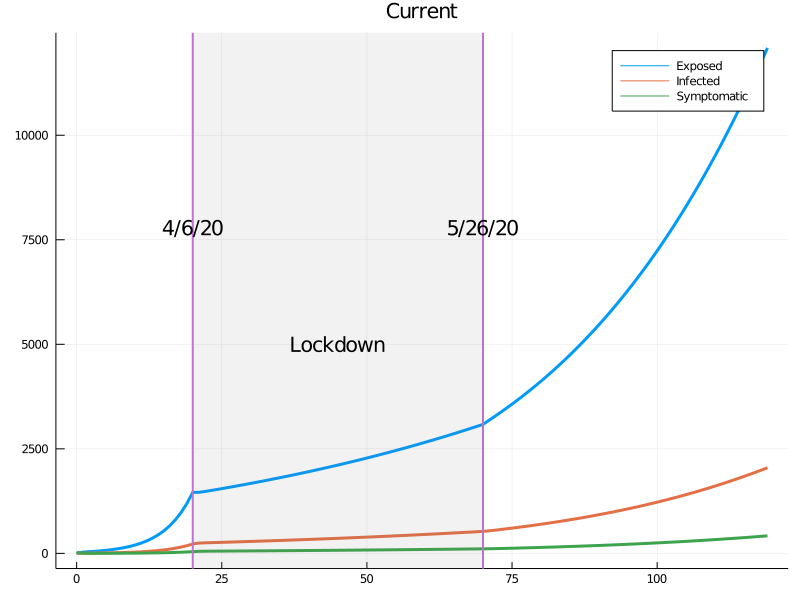

In [7]:
fig1 = plot(x, [exposed, infected, symptomatic], labels=["Exposed" "Infected" "Symptomatic"], lw=3, size=(800, 600), title="Current")
vline!([20, 70], label="", lw=2)
vspan!([20, 70], color= :grey, alpha=0.1, label="")
annotate!(45, 5000, "Lockdown", :center)
annotate!(20, 7500, "4/6/20", :bottom)
annotate!(70, 7500, "5/26/20", :bottom)

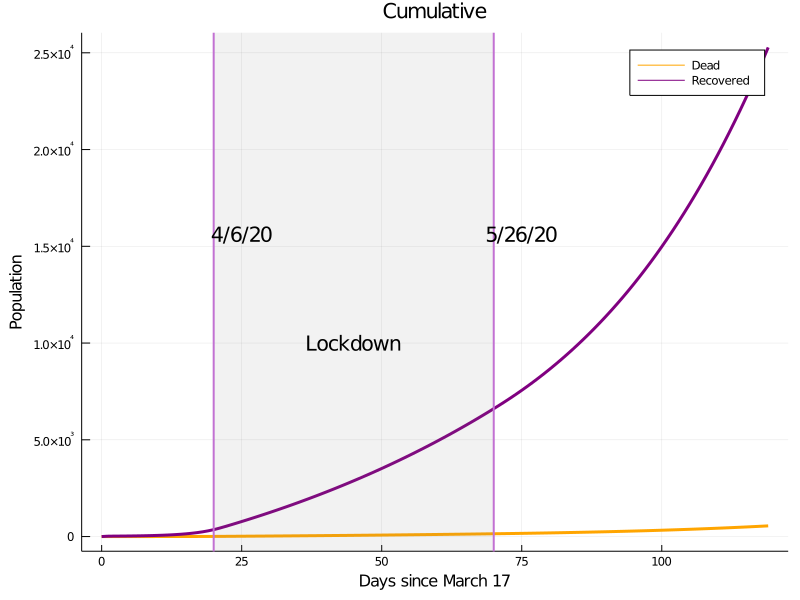

In [8]:
fig2 = plot(x, dead, label="Dead", lw=3, color= :orange, size=(800, 600), title="Cumulative")
plot!(x, recovered, label="Recovered", lw=3, color= :purple)
vspan!([20, 70], color= :grey, alpha=0.1, label="")
vline!([20, 70], label="", lw=2)
xlabel!("Days since March 17")
ylabel!("Population")
annotate!(45, 10000, "Lockdown", :center)
annotate!(25, 15000, "4/6/20", :bottom)
annotate!(75, 15000, "5/26/20", :bottom)